In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.io.json import json_normalize

from collections import Counter
from pymongo import MongoClient
#from pydocumentdb import document_client
from scipy.stats import spearmanr

import pprint

%matplotlib inline

# Data loading

**Create a MongoDB client, select our database and collection**

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client['ted']
coll = db['talks']

In [3]:
db.list_collection_names() # list collections in database

['talks', 'similarities']

In [4]:
talk_one = coll.find().limit(1) # get one document

In [5]:
for talk in talk_one:
    pprint.pprint(talk)

{'_id': ObjectId('5b43d69485d82703bfc8b18f'),
 'description': 'Navigating territorial hippos and active minefields, TED '
                'Fellow Steve Boyes and a team of scientists have been '
                "traveling through the Okavango Delta, Africa's largest "
                'remaining wetland wilderness, to explore and protect this '
                'near-pristine habitat against the rising threat of '
                'development. In this awe-inspiring talk packed with images, '
                'he shares his work doing detailed scientific surveys in the '
                'hopes of protecting this enormous, fragile wilderness.',
 'duration': 541.0,
 'event': 'TED2018',
 'external_links': ['https://www.imdb.com/title/tt0402399/',
                    'https://www.nationalgeographic.org/projects/okavango/',
                    'https://www.amazon.com/Half-Earth-Our-Planets-Fight-Life/dp/1631492527/ref=as_li_tf_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=0520271440&linkCode=

Select the most recently published talk.

**Note**: Cosmos DB uses its own [SQL dialect](https://docs.microsoft.com/en-us/azure/cosmos-db/sql-api-sql-query), which you can test out using the [Query Playground](https://www.documentdb.com/sql/demo).

In [7]:
#query_talks('SELECT TOP 1 * FROM talks t ORDER BY t.published_at DESC')

[{'_attachments': 'attachments/',
  '_etag': '"0000220f-0000-0000-0000-5ae9e0ba0000"',
  '_rid': 'W1FiAMyQFgDYCgAAAAAAAA==',
  '_self': 'dbs/W1FiAA==/colls/W1FiAMyQFgA=/docs/W1FiAMyQFgDYCgAAAAAAAA==/',
  '_ts': 1525276858,
  'description': 'To make accountability the norm after gender violence in the United States, we need to change tactics, says victims\' rights attorney and TED Fellow Laura L. Dunn. Instead of going institution by institution, fighting for reform, we need to go to the Constitution and finally pass the Equal Rights Amendment, which would require states to address gender inequality and violence. By ushering in sweeping change, Dunn says, "our legal system can become a system of justice, and #MeToo can finally become \'no more.\'"',
  'duration': 373,
  'event': 'TED2018',
  'external_links': ['https://www.aclu.org/video/domestic-violence-human-rights-lenahan-v-usa',
   'https://www.youtube.com/watch?v=h-y4nzjxgwA',
   'http://equalmeansequal.com/trailer/'],
  'filmed_a

Extract all the talks and create a `DataFrame`.

In [14]:
#datapoints = list(coll.find({}))

#talks_df = json_normalize(datapoints)
talks_df = pd.DataFrame(list(coll.find({})))
talks_df.head()

,_id,description,duration,event,external_links,id,published_at,ratings,speakers,tags,timings,title,transcript,url,viewed
0,5b43d69485d82703bfc8b18f,Navigating territorial hippos and active minef...,541.0,TED2018,"[https://www.imdb.com/title/tt0402399/, https:...",19330,1530648237,"{'Persuasive': 3, 'Courageous': 12, 'Fascinati...","[{'id': '1833', 'first_name': 'Steve', 'last_n...","[conservation, nature, animals, science, beaut...","{'intro': {'start': 0, 'end': 12.0047299999999...",How we're saving one of Earth's last wild places,"[{'time': 687, 'text': 'Visible from space,'},...",https://www.ted.com/talks/steve_boyes_how_we_r...,414293
1,5b43d69585d82703bfc8b190,Our planet has a carbon problem -- if we don't...,855.0,TED2018,[https://www.amazon.com/Climate-Intervention-D...,19756,1530801858,"{'Jaw-dropping': 0, 'Informative': 23, 'Fascin...","[{'id': '3936', 'first_name': 'Jennifer', 'las...","[alternative energy, climate change, electrici...","{'intro': {'start': 0, 'end': 12.0047299999999...",A new way to remove CO2 from the atmosphere,"[{'time': 1087, 'text': 'Four hundred parts pe...",https://www.ted.com/talks/jennifer_wilcox_a_ne...,441734
2,5b43d69585d82703bfc8b191,Jakob Magolan is here to change your perceptio...,953.0,TEDxUIdaho,[https://www.amazon.com/Napoleons-Buttons-Mole...,16782,1530887479,"{'Beautiful': 4, 'Fascinating': 15, 'Jaw-dropp...","[{'id': '4077', 'first_name': 'Jakob', 'last_n...","[chemistry, TEDx, education, science, teaching]","{'intro': {'start': 0, 'end': 12.0047299999999...",A crash course in organic chemistry,"[{'time': 623, 'text': 'I'd like you to ask yo...",https://www.ted.com/talks/jakob_magolan_a_cras...,399468
3,5b43d69585d82703bfc8b192,The Chinese internet has grown at a staggering...,761.0,TED2018,[https://www.scmp.com/video/china/2133426/extr...,19461,1531148069,"{'Courageous': 3, 'Beautiful': 0, 'Confusing':...","[{'id': '3931', 'first_name': 'Gary', 'last_na...","[china, Asia, business, communication, data, s...","{'intro': {'start': 0, 'end': 12.0047299999999...",The rapid growth of the Chinese internet -- an...,"[{'time': 833, 'text': 'Once every 12 months,'...",https://www.ted.com/talks/gary_liu_the_rapid_g...,117986
4,5b43d69585d82703bfc8b193,Dragonflies can catch prey with near perfect a...,317.0,DIY Neuroscience,[https://www.ted.com/series/diy-neuroscience],17697,1528733297,"{'Beautiful': 4, 'Ingenious': 2, 'Informative'...","[{'id': '1260', 'first_name': 'Greg', 'last_na...","[science, animals, insects, neuroscience]","{'intro': {'start': 0, 'end': 12.0047299999999...",How a dragonfly's brain is designed to kill,"[{'time': 200, 'text': 'Greg Gage: If I asked ...",https://www.ted.com/talks/diy_neuroscience_the...,83322


In [15]:
talks_df.columns

Index(['_id', 'description', 'duration', 'event', 'external_links', 'id',
       'published_at', 'ratings', 'speakers', 'tags', 'timings', 'title',
       'transcript', 'url', 'viewed'],
      dtype='object')

# Data cleaning

Create a new variable `scraped_at` from the Cosmos DB `_ts` attribute.

In [37]:
#talks_df['scraped_at'] = pd.to_datetime(talks_df['_ts'], unit='s')

Get rid of Cosmos DB attributes.

In [11]:
#talks_df.drop(columns=['_attachments', '_etag', '_rid', '_self', '_ts'], inplace=True) # Not applicable for Mongodb

Fix data types for `filmed_at` and `published_at`.

In [16]:
#talks_df['filmed_at'] = pd.to_datetime(talks_df['filmed_at'], unit='s')
talks_df['published_at'] = pd.to_datetime(talks_df['published_at'], unit='s')

Convert `duration` to minutes.

In [17]:
talks_df['duration'] /= 60

Check sanity of values.

In [18]:
talks_df.describe(exclude='object')

,duration,published_at,viewed
count,1092.000000,1092,1.092000e+03
unique,NaN,1092,NaN
top,NaN,2012-10-26 15:00:15,NaN
freq,NaN,1,NaN
first,NaN,2012-05-13 14:03:24,NaN
last,NaN,2018-07-09 14:54:29,NaN
mean,12.692125,NaN,1.859351e+06
std,4.562468,NaN,2.599881e+06
min,0.000000,NaN,4.686700e+04
25%,9.745833,NaN,9.989018e+05


In [15]:
#talks_df.sort_values('filmed_at')

,description,duration,event,external_links,filmed_at,id,published_at,ratings,speakers,tags,timings,title,transcript,url,viewed,scraped_at
2014,"In this rare clip from 1972, legendary psychia...",4.366667,Toronto Youth Corps,[],1972-05-14,857,2010-05-14 14:37:00,"{'Inspiring': 1699, 'Beautiful': 350, 'Persuas...","[{'id': '707', 'first_name': 'Viktor', 'last_n...","[humanity, mind, peace, psychology, war]",NaN,Why believe in others,NaN,https://www.ted.com/talks/viktor_frankl_youth_...,1205696,2018-05-02 16:36:48
2118,"In this archival footage from BBC TV, celebrat...",65.916667,BBC TV,[],1983-07-08,784,2010-03-03 15:57:00,"{'Informative': 339, 'Fascinating': 373, 'Insp...","[{'id': '673', 'first_name': 'Richard', 'last_...","[astronomy, physics, science]",NaN,Physics is fun to imagine,NaN,https://www.ted.com/talks/richard_feynman,561942,2018-05-02 16:37:08
2694,"With surprising accuracy, Nicholas Negroponte ...",25.383333,TED1984,[],1984-02-02,230,2008-03-11 01:26:00,"{'Jaw-dropping': 79, 'Funny': 24, 'Courageous'...","[{'id': '38', 'first_name': 'Nicholas', 'last_...","[demo, design, entertainment, future, interfac...","{'intro': {'start': 0, 'end': 12.0047299999999...","5 predictions, from 1984","[{'time': 0, 'text': 'In this rather long sort...",https://www.ted.com/talks/nicholas_negroponte_...,999415,2018-05-02 16:44:41
2696,"Before he was a legend, architect Frank Gehry ...",44.633333,TED1990,[],1990-03-03,231,2008-03-13 01:38:00,"{'Longwinded': 76, 'Beautiful': 19, 'Informati...","[{'id': '14', 'first_name': 'Frank', 'last_nam...","[architecture, collaboration, design, global i...","{'intro': {'start': 0, 'end': 12.0047299999999...",My days as a young rebel,"[{'time': 0, 'text': 'I'm going to go right in...",https://www.ted.com/talks/frank_gehry_as_a_you...,641062,2018-05-02 16:44:45
2171,"At the Royal Institution in 1991, Richard Dawk...",57.916667,Royal Institution,[],1991-12-20,746,2010-01-23 13:10:00,"{'Fascinating': 157, 'Inspiring': 136, 'Beauti...","[{'id': '93', 'first_name': 'Richard', 'last_n...","[biology, evolution, life, science, universe]",NaN,Growing up in the universe,NaN,https://www.ted.com/talks/richard_dawkins_grow...,320421,2018-05-02 16:37:54
1675,"From deep in the TED archive, Danny Hillis out...",19.166667,TED1994,[],1994-02-20,1346,2012-02-03 16:06:37,"{'Longwinded': 35, 'Fascinating': 276, 'Inform...","[{'id': '961', 'first_name': 'Danny', 'last_na...","[DNA, computers, engineering, evolution, futur...","{'intro': {'start': 0, 'end': 12.0047299999999...",Back to the future (of 1994),"[{'time': 0, 'text': 'Because I usually take t...",https://www.ted.com/talks/danny_hillis_back_to...,604706,2018-05-02 16:27:54
2357,"In this TED archive video from 1998, paralympi...",22.416667,TED1998,[],1998-02-02,443,2009-01-28 01:00:00,"{'Courageous': 256, 'Inspiring': 377, 'Beautif...","[{'id': '402', 'first_name': 'Aimee', 'last_na...","[beauty, body language, design, prosthetics, s...","{'intro': {'start': 0, 'end': 12.0047299999999...",Changing my legs - and my mindset,"[{'time': 4000, 'text': 'Sheryl Shade: Hi, Aim...",https://www.ted.com/talks/aimee_mullins_on_run...,1069077,2018-05-02 16:41:49
2363,From the TED archives: The legendary graphic d...,15.233333,TED1998,[],1998-02-02,455,2009-02-11 01:00:00,"{'Fascinating': 58, 'OK': 27, 'Inspiring': 79,...","[{'id': '406', 'first_name': 'Milton', 'last_n...","[art, communication, creativity, culture, design]","{'intro': {'start': 0, 'end': 12.0047299999999...",Using design to make ideas new,"[{'time': 0, 'text': ''Theme and variations' i...",https://www.ted.com/talks/milton_glaser_on_usi...,404584,2018-05-02 16:41:59
2376,"At TED in 1998, Brenda Laurel asks: Why are al...",13.133333,TED1998,[http://www.amazon.com/Critical-Play-Radical-G...,1998-02-02,474,2009-03-02 01:00:00,"{'OK': 90, 'Informative': 100, 'Unconvincing':...","[{'id': '413', 'first_name': 'Brenda', 'last_n...","[children, culture, design, entertainment, gam...","{'intro': {'start': 0, 'end': 12

Create a few more variables.

In [19]:
talks_df['external_links_count'] = talks_df['external_links'].apply(len)
talks_df['speakers_count'] = talks_df['speakers'].apply(len)
talks_df['tags_count'] = talks_df['tags'].apply(len)
#talks_df['publishing_delay'] = (talks_df['published_at'] - talks_df['filmed_at']) / np.timedelta64(1, 'D')
talks_df['total_ratings'] = talks_df['ratings'].apply(lambda x: sum(x.values()))
#talks_df['views_per_day'] = talks_df['viewed'] / \
#                            ((talks_df['scraped_at'] - talks_df['published_at']) / np.timedelta64(1, 'D'))

Extract `ratings` into separate variables.

In [20]:
rating_names = {name for names in talks_df['ratings'] for name in names}

In [21]:
rating_names

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [22]:
for rating_name in rating_names:
    talks_df['rated_' + rating_name.lower()] = talks_df['ratings'].apply(lambda x: x.get(rating_name, 0)) / \
                                               talks_df['total_ratings']

Create dummy variables for the most common `tags` (present in ≥ 5% of the talks).

In [23]:
all_tags = Counter(tag for tags in talks_df['tags'] for tag in tags)
frequent_tags = {tag for tag, count in all_tags.items() if count >= 0.05 * len(talks_df)}

In [24]:
frequent_tags

{'Africa',
 'Internet',
 'TED Fellows',
 'TEDx',
 'activism',
 'animals',
 'art',
 'biology',
 'brain',
 'business',
 'children',
 'climate change',
 'collaboration',
 'communication',
 'community',
 'computers',
 'creativity',
 'culture',
 'data',
 'design',
 'economics',
 'education',
 'engineering',
 'environment',
 'family',
 'future',
 'global issues',
 'government',
 'health',
 'history',
 'humanity',
 'identity',
 'inequality',
 'innovation',
 'life',
 'medicine',
 'nature',
 'personal growth',
 'politics',
 'potential',
 'science',
 'social change',
 'society',
 'technology',
 'women'}

In [25]:
for tag in frequent_tags:
    talks_df['tagged_' + tag.lower().replace(' ', '_')] = talks_df['tags'].apply(lambda x: tag in x).astype(int)

In [26]:
talks_df.head()

,_id,description,duration,event,external_links,id,published_at,ratings,speakers,tags,...,tagged_culture,tagged_design,tagged_politics,tagged_global_issues,tagged_science,tagged_ted_fellows,tagged_identity,tagged_nature,tagged_inequality,tagged_humanity
0,5b43d69485d82703bfc8b18f,Navigating territorial hippos and active minef...,9.016667,TED2018,"[https://www.imdb.com/title/tt0402399/, https:...",19330,2018-07-03 20:03:57,"{'Persuasive': 3, 'Courageous': 12, 'Fascinati...","[{'id': '1833', 'first_name': 'Steve', 'last_n...","[conservation, nature, animals, science, beaut...",...,0,0,0,0,1,1,0,1,0,1
1,5b43d69585d82703bfc8b190,Our planet has a carbon problem -- if we don't...,14.250000,TED2018,[https://www.amazon.com/Climate-Intervention-D...,19756,2018-07-05 14:44:18,"{'Jaw-dropping': 0, 'Informative': 23, 'Fascin...","[{'id': '3936', 'first_name': 'Jennifer', 'las...","[alternative energy, climate change, electrici...",...,0,0,0,0,1,0,0,0,0,0
2,5b43d69585d82703bfc8b191,Jakob Magolan is here to change your perceptio...,15.883333,TEDxUIdaho,[https://www.amazon.com/Napoleons-Buttons-Mole...,16782,2018-07-06 14:31:19,"{'Beautiful': 4, 'Fascinating': 15, 'Jaw-dropp...","[{'id': '4077', 'first_name': 'Jakob', 'last_n...","[chemistry, TEDx, education, science, teaching]",...,0,0,0,0,1,0,0,0,0,0
3,5b43d69585d82703bfc8b192,The Chinese internet has grown at a staggering...,12.683333,TED2018,[https://www.scmp.com/video/china/2133426/extr...,19461,2018-07-09 14:54:29,"{'Courageous': 3, 'Beautiful': 0, 'Confusing':...","[{'id': '3931', 'first_name': 'Gary', 'last_na...","[china, Asia, business, communication, data, s...",...,0,0,0,0,0,0,0,0,0,0
4,5b43d69585d82703bfc8b193,Dragonflies can catch prey with near perfect a...,5.283333,DIY Neuroscience,[https://www.ted.com/series/diy-neuroscience],17697,2018-06-11 16:08:17,"{'Beautiful': 4, 'Ingenious': 2, 'Informative'...","[{'id': '1260', 'first_name': 'Greg', 'last_na...","[science, animals, insects, neuroscience]",...,0,0,0,0,1,0,0,0,0,0


In [27]:
talks_df.dtypes

_id                               object
description                       object
duration                         float64
event                             object
external_links                    object
id                                object
published_at              datetime64[ns]
ratings                           object
speakers                          object
tags                              object
timings                           object
title                             object
transcript                        object
url                               object
viewed                             int64
external_links_count               int64
speakers_count                     int64
tags_count                         int64
total_ratings                      int64
rated_ingenious                  float64
rated_jaw-dropping               float64
rated_obnoxious                  float64
rated_persuasive                 float64
rated_funny                      float64
rated_courageous

# Exploratory data analysis

## Distribution of talk duration

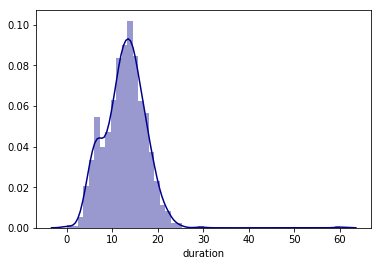

In [28]:
sns.distplot(talks_df['duration'], color='darkblue')  # In minutes

## Top 20 events by number of talks

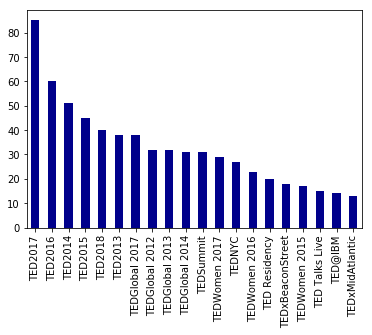

In [29]:
talks_df['event'].value_counts().head(20).plot.bar(color='darkblue')

## Number of external links

**Note**: the rightmost bar is for 10+ links.

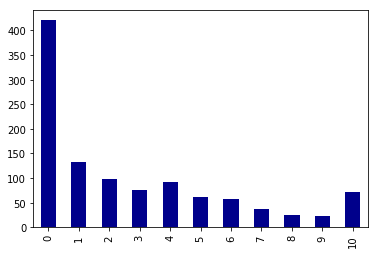

In [30]:
pd.cut(talks_df['external_links_count'],
       bins=list(range(11)) + [np.inf],
       labels=False,
       include_lowest=True).value_counts().sort_index().plot.bar(color='darkblue')

## Talks filmed by year

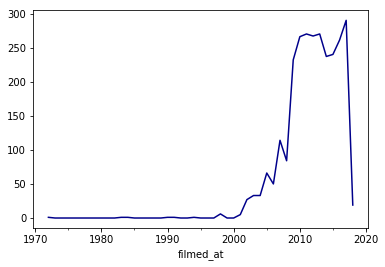

In [28]:
#talks_df.set_index('filmed_at') \
#    .resample('Y')['id'] \
#    .count() \
#    .plot.line(color='darkblue')

Excluding very old talks.

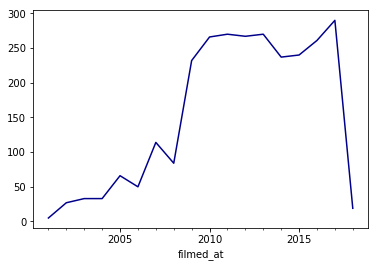

In [29]:
#talks_df[talks_df['filmed_at'] >= '2000'] \
#    .set_index('filmed_at') \
#    .resample('Y')['id'].count() \
#    .plot.line(color='darkblue')

## Distribution of publishing delay

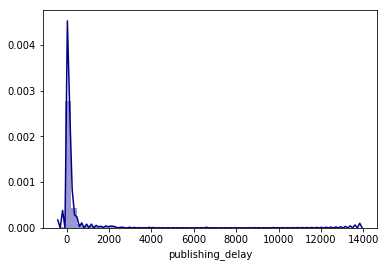

In [30]:
#sns.distplot(talks_df['publishing_delay'], color='darkblue')

Excluding very old talks.

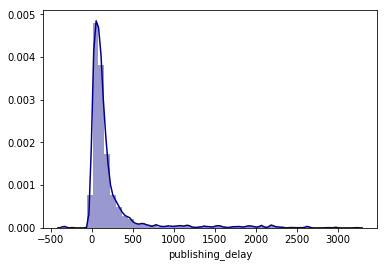

In [31]:
#sns.distplot(talks_df[talks_df['filmed_at'] >= '2000']['publishing_delay'], color='darkblue')

## Number of ratings

In [31]:
talks_df['total_ratings'].describe()

count     1092.000000
mean      1959.530220
std       3450.115796
min          3.000000
25%        628.750000
50%       1161.500000
75%       2010.750000
max      73312.000000
Name: total_ratings, dtype: float64

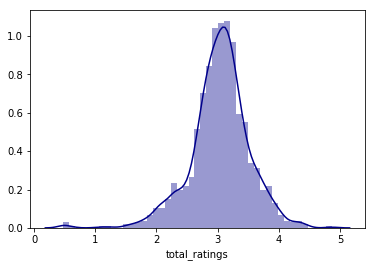

In [32]:
sns.distplot(np.log10(talks_df['total_ratings']), color='darkblue')

## Number of speakers

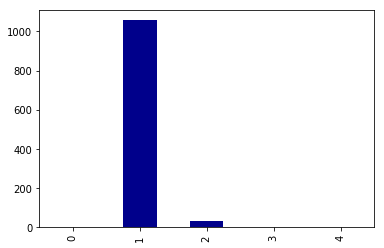

In [33]:
talks_df['speakers_count'].value_counts().sort_index().plot.bar(color='darkblue')

## Number of tags

**Note**: the rightmost bar is for 20+ tags.

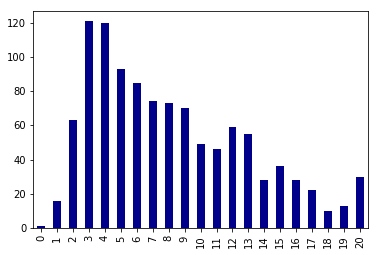

In [34]:
pd.cut(talks_df['tags_count'],
       bins=list(range(21)) + [np.inf],
       labels=False,
       include_lowest=True).value_counts().sort_index().plot.bar(color='darkblue')

## Distribution of views and views/day

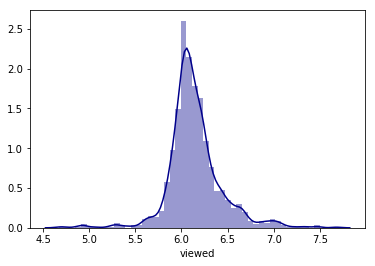

In [35]:
sns.distplot(np.log10(talks_df['viewed']), color='darkblue')

In [37]:
#sns.distplot(np.log10(talks_df['views_per_day']), color='darkblue')

## Spearman correlations with views/day

In [38]:
columns = talks_df.select_dtypes(exclude=['datetime', 'object']).columns
rating_corr = pd.DataFrame({
    'variable': columns,
    'r': [spearmanr(talks_df[x], talks_df['views_per_day']).correlation for x in columns],
}).sort_values('r')

In [39]:
rating_corr[np.abs(rating_corr['r']) > 0.1]

,r,variable
12,-0.393055,rated_longwinded
9,-0.328173,rated_ok
15,-0.297059,rated_obnoxious
10,-0.292476,rated_unconvincing
13,-0.273829,rated_confusing
23,-0.191546,tagged_global_issues
21,-0.180779,rated_jaw-dropping
32,-0.154440,tagged_entertainment
29,-0.147298,tagged_design
5,-0.142400,publishing_delay
